# Group Assignment 2
## Heatwaves CA NIHHIS

In [4]:
import pandas as pd
import geopandas as gpd

#### Importing a data set from [NIHHIS](https://www.heat.gov/datasets/9da4eeb936544335a6db0cd7a8448a51_0/about)

In [5]:
heatwave = pd.read_csv ('Data/National_Risk_Index_Census_Tracts.csv')

#### Understanding the type of data set

In [6]:
type(heatwave)

pandas.core.frame.DataFrame

#### Verbose shows all the columns, show_counts shows the number of non-null values. This will allow me to see if there are errors in the data and what the column names are

In [7]:
heatwave.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 370 columns):
 #    Column        Non-Null Count  Dtype  
---   ------        --------------  -----  
 0    OBJECTID      7339 non-null   int64  
 1    NRI_ID        7339 non-null   object 
 2    STATE         7339 non-null   object 
 3    STATEABBRV    7339 non-null   object 
 4    STATEFIPS     7339 non-null   int64  
 5    COUNTY        7339 non-null   object 
 6    COUNTYTYPE    7339 non-null   object 
 7    COUNTYFIPS    7339 non-null   int64  
 8    STCOFIPS      7339 non-null   int64  
 9    TRACT         7339 non-null   int64  
 10   TRACTFIPS     7339 non-null   int64  
 11   POPULATION    7339 non-null   int64  
 12   BUILDVALUE    7339 non-null   int64  
 13   AGRIVALUE     7339 non-null   float64
 14   AREA          7339 non-null   float64
 15   RISK_SCORE    7320 non-null   float64
 16   RISK_RATNG    7339 non-null   object 
 17   RISK_NPCTL    7339 non-null   float64
 18   RISK_S

#### This command will let me see the first 5 rows to give a preview of what I will want the data to look like.

In [8]:
heatwave.head()

,OBJECTID,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,TRACT,...,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,WNTW_RISKS,WNTW_RISKR,NRI_VER,GlobalID,SHAPE_Length,SHAPE_Area
0,1850,T06037194200,California,CA,6,Los Angeles,County,37,6037,194200,...,0.000000e+00,0.000,0.000000,No Expected Annual Losses,0.000000,No Rating,November 2021,{F9107B2F-A77F-427A-B80C-68D73E05FC50},0.088751,0.000254
1,1851,T06037800504,California,CA,6,Los Angeles,County,37,6037,800504,...,0.000000e+00,0.000,0.000000,No Expected Annual Losses,0.000000,No Rating,November 2021,{112CFD86-9383-4614-9248-E2022077CA8F},0.344150,0.002084
2,1852,T06037800506,California,CA,6,Los Angeles,County,37,6037,800506,...,0.000000e+00,0.000,0.000000,No Expected Annual Losses,0.000000,No Rating,November 2021,{64DA6071-A0FE-4263-A1A5-CC5F546313E7},0.302074,0.002580
3,1853,T06037920020,California,CA,6,Los Angeles,County,37,6037,920020,...,0.000000e+00,0.000,0.000000,No Expected Annual Losses,0.000000,No Rating,November 2021,{97D055E4-1F17-4332-9635-E7EFF54E0BED},0.187560,0.001065
4,1854,T06065041409,California,CA,6,Riverside,County,65,6065,41409,...,2.753710e-07,34.953,5.204641,Very Low,2.608187,Very Low,November 2021,{D7AA34C1-4D2F-4FD5-B5CC-4A7C81ACA044},0.348938,0.004117


#### The data set is large so this command will let me keep the columns, that I want to only view in the future maps I will create.

In [9]:
columns_to_keep = ['HWAV_EVNTS',
                   'STATE',
                   'COUNTY',
                   'HWAV_EXPP',
                   'HWAV_EXPT',
                   'HWAV_EALP',
                   'HWAV_RISKR'
                 ]
# add it to a new dataframe
heatwave2 = heatwave[columns_to_keep]

#### This allows me to return the list of columns.

In [10]:
# returns list of columns 
columns = list(heatwave2) 
columns

['HWAV_EVNTS',
 'STATE',
 'COUNTY',
 'HWAV_EXPP',
 'HWAV_EXPT',
 'HWAV_EALP',
 'HWAV_RISKR']

#### This command will alolow for me to rename the columns to the wanted title of the columns.

In [11]:
heatwave2.columns = ['Heat Wave - Number of Events',
'State Name', 
'County Name',
'Heat Wave - Exposure - Population',
'Heat Wave - Exposure - Total',
'Heat Wave - Expected Annual Loss - Population',
'Heat Wave - Hazard Type Risk Index Rating'
]

#### This will let me view the data in a sample of 5 to see if the commands from previously lines have been read the way in which I want them to be viewed.

In [12]:
heatwave2.sample(5)

,Heat Wave - Number of Events,State Name,County Name,Heat Wave - Exposure - Population,Heat Wave - Exposure - Total,Heat Wave - Expected Annual Loss - Population,Heat Wave - Hazard Type Risk Index Rating
5366,15.0,California,Contra Costa,4518.0,3.490741e+10,0.000195,Relatively Low
6622,4.0,California,San Francisco,2474.0,1.913205e+10,0.000101,Relatively Low
1266,58.0,California,Los Angeles,3897.0,3.000346e+10,0.000031,Relatively Low
5318,28.0,California,Madera,10546.0,8.092150e+10,0.005571,Very High
3842,50.0,California,San Bernardino,4141.0,3.174782e+10,0.000075,Relatively Low


#### This command will let me view a single column.

In [13]:
# access a single column like df['col_name'] sqaure brackets used when there are spaces
heatwave2['Heat Wave - Number of Events'].head()

0     11.0
1    124.0
2     66.0
3     56.0
4     50.0
Name: Heat Wave - Number of Events, dtype: float64

# Looking at the mean, median, and statistsics

In [14]:
#what is the mean
heatwave2['Heat Wave - Number of Events'].mean()

27.532025074952305

In [15]:
#what is the median
heatwave2['Heat Wave - Number of Events'].median()

17.0

In [16]:
# stats
heatwave2['Heat Wave - Number of Events'].describe()

count    7338.000000
mean       27.532025
std        34.007421
min         0.000000
25%         6.000000
50%        17.000000
75%        50.000000
max      1018.000000
Name: Heat Wave - Number of Events, dtype: float64

# Histogram, Box Plot, and Scatter Plots

<Axes: ylabel='Frequency'>

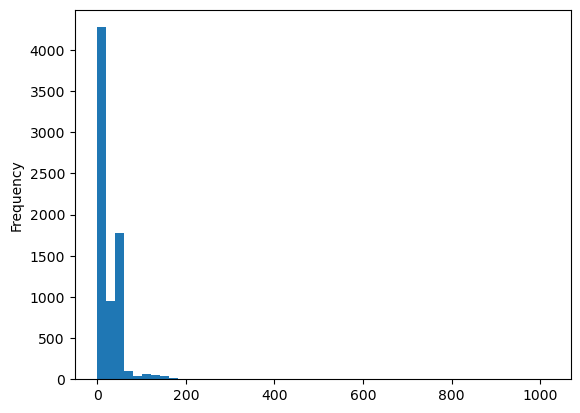

In [37]:
#looking at the data with a histogram- this visually is a good way of seeing the data to see the frequency in events
heatwave2['Heat Wave - Number of Events'].plot.hist(bins=50)

<Axes: >

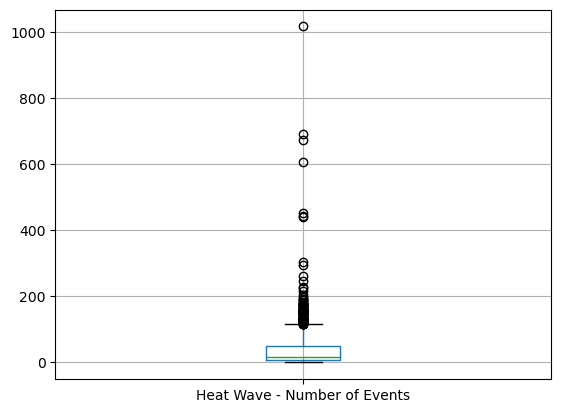

In [38]:
# Box Plot- this is also a good representation and allows you to see the outlier
heatwave2.boxplot(column=['Heat Wave - Number of Events'])

<Axes: xlabel='Heat Wave - Number of Events', ylabel='State Name'>

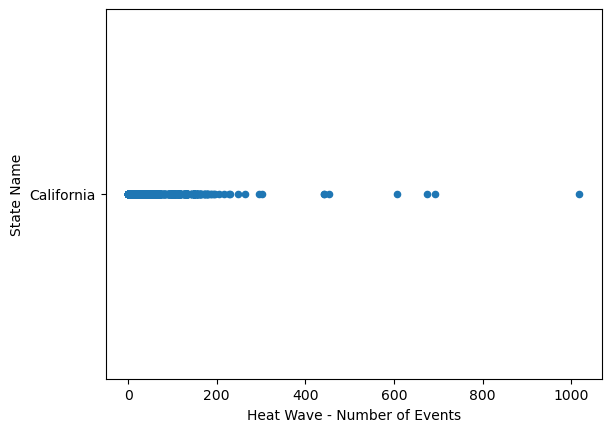

In [39]:
# Scatter Plot- since there is only one state I am looking at this representation may not be needed but still is a good representation of the heeat wave number of events
heatwave2.plot.scatter(x='Heat Wave - Number of Events',y='State Name')

# Top 10 Heatwaves Sorted by State

In [20]:
#top ten heatwaves
heatwave_sorted = heatwave2.sort_values(by='Heat Wave - Number of Events',ascending = False)

In [21]:
#Display top 10 columns
heatwave_sorted[['State Name','Heat Wave - Number of Events']].head(10)

,State Name,Heat Wave - Number of Events
3033,California,1018.0
3109,California,693.0
53,California,675.0
4094,California,607.0
3745,California,453.0
54,California,443.0
3538,California,441.0
3632,California,303.0
2500,California,296.0
4098,California,263.0


<Axes: xlabel='State Name'>

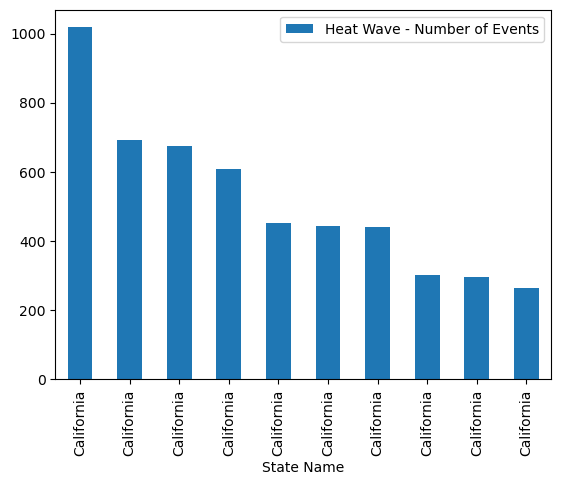

In [22]:
#histogram showing data
heatwave_sorted.head(10).plot.bar(x='State Name',
                            y='Heat Wave - Number of Events')

<Axes: title={'center': 'Top 10 Heatwaves in CA (Updated until 2023 NIHHIS)'}, ylabel='State Name'>

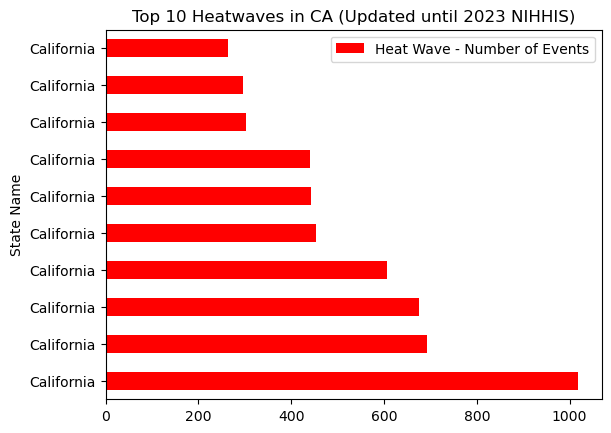

In [23]:
#Label
heatwave_sorted.head(10).plot.barh(x='State Name',
                            y= 'Heat Wave - Number of Events', 
                            title='Top 10 Heatwaves in CA (Updated until 2023 NIHHIS)',
                            color='red')

# Creating Maps of Data

In [24]:
import geopandas as gpd

#### Loading in the file as a shapefile for geopandas [NIHHIS](https://www.heat.gov/datasets/9da4eeb936544335a6db0cd7a8448a51_0/about)

In [25]:
heatwaveca=gpd.read_file('Data/National_Risk_Index_Census_TractsSF.zip')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


## Plotting the data
#### This visual shows the heat waves spread throughout California and allows us to see where they are concentrated

<Axes: >

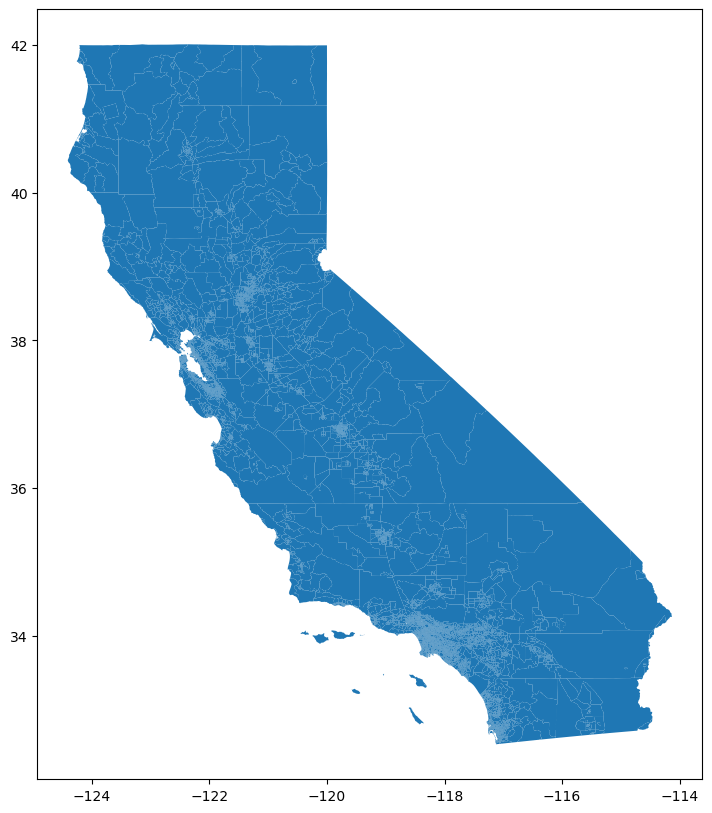

In [26]:
heatwaveca.plot(figsize=(12,10))

#### More info on the data set
## This will alow for me to see the columns I want to plot

In [27]:
heatwaveca.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9106 entries, 0 to 9105
Data columns (total 471 columns):
 #    Column      Non-Null Count  Dtype   
---   ------      --------------  -----   
 0    OBJECTID    9106 non-null   int64   
 1    NRI_ID      9106 non-null   object  
 2    STATE       9106 non-null   object  
 3    STATEABBRV  9106 non-null   object  
 4    STATEFIPS   9106 non-null   object  
 5    COUNTY      9106 non-null   object  
 6    COUNTYTYPE  9106 non-null   object  
 7    COUNTYFIPS  9106 non-null   object  
 8    STCOFIPS    9106 non-null   object  
 9    TRACT       9106 non-null   object  
 10   TRACTFIPS   9106 non-null   object  
 11   POPULATION  9106 non-null   int64   
 12   BUILDVALUE  9106 non-null   float64 
 13   AGRIVALUE   9106 non-null   float64 
 14   AREA        9106 non-null   float64 
 15   RISK_VALUE  9106 non-null   float64 
 16   RISK_SCORE  9106 non-null   float64 
 17   RISK_RATNG  9106 non-null   object  
 18   RISK_SPCTL  9106 n

## Plotting choropleth maps using different formatting
#### Each one allows for us to see the heat wave events and the concentration in different areas. The coloring allows for us to see the amount of heat wave events in a better visual manner than the prior map as it is color coded.

<Axes: >

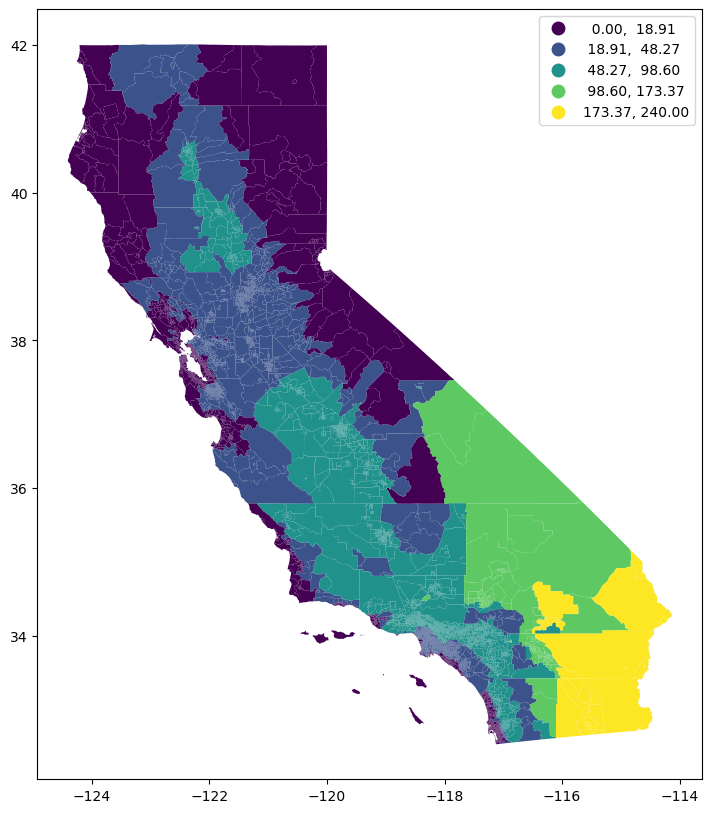

In [28]:
heatwaveca.plot(figsize=(12,10),
                 column='HWAV_EVNTS',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

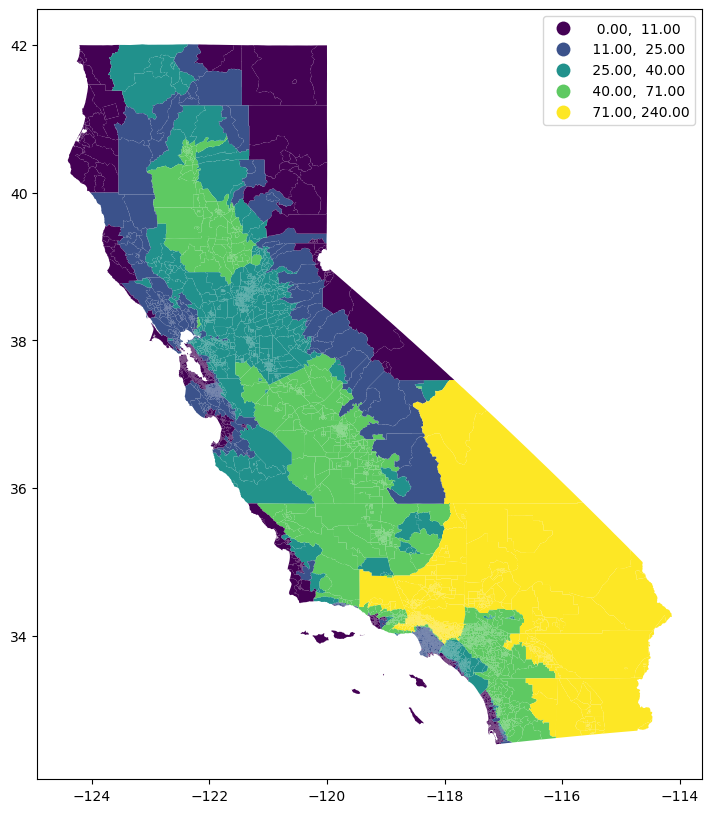

In [29]:
heatwaveca.plot(figsize=(12,10),
                 column='HWAV_EVNTS',
                 legend=True, 
                 scheme='quantiles')

<Axes: >

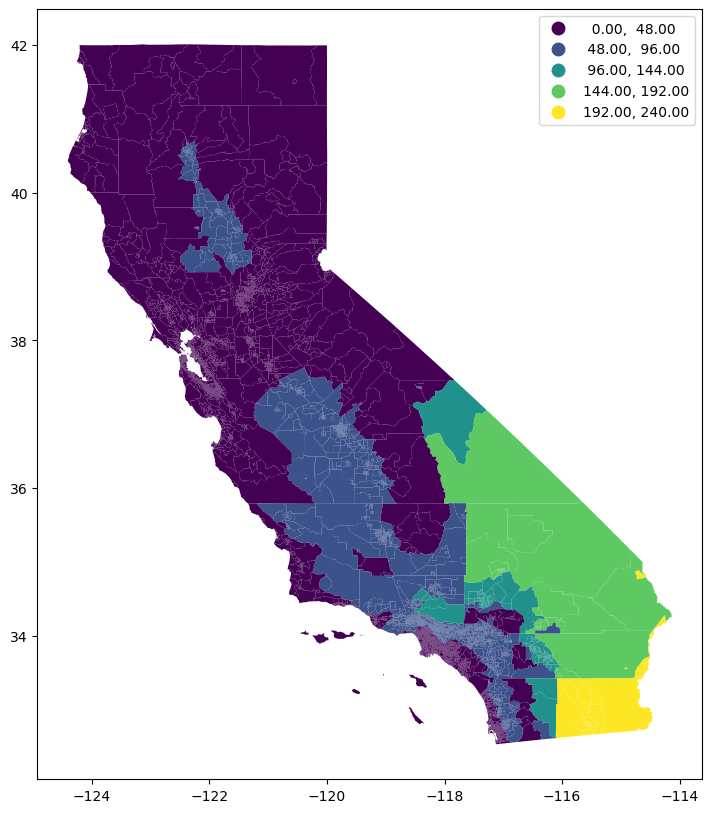

In [30]:
heatwaveca.plot(figsize=(12,10),
                 column='HWAV_EVNTS',
                 legend=True, 
                 scheme='equal_interval')